In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt
%matplotlib inline

from squeezenet import SqueezeNet, preprocess_input

Using TensorFlow backend.


In [3]:
data_dir = '/home/ubuntu/data/'

In [4]:
data_generator = ImageDataGenerator(
    data_format='channels_last',
    preprocessing_function=preprocess_input
)

train_generator = data_generator.flow_from_directory(
    data_dir + 'train', 
    target_size=(299, 299),
    batch_size=64
)

val_generator = data_generator.flow_from_directory(
    data_dir + 'val', shuffle=False,
    target_size=(299, 299),
    batch_size=64
)

Found 25600 images belonging to 256 classes.
Found 5120 images belonging to 256 classes.


# Model

In [5]:
model = SqueezeNet(weight_decay=1e-4, image_size=299)
model.count_params()

853824

# Training

In [6]:
model.compile(
    optimizer=optimizers.SGD(lr=1e-2, momentum=0.9, nesterov=True), 
    loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy']
)

In [7]:
model.fit_generator(
    train_generator, 
    steps_per_epoch=400, epochs=30, verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_acc', patience=4, min_delta=0.01),
        ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=2, epsilon=0.007)
    ],
    validation_data=val_generator, validation_steps=80, workers=4
)

Epoch 1/30
400/400 [==============================] - 36s - loss: 2.3837 - acc: 0.4822 - top_k_categorical_accuracy: 0.7059 - val_loss: 1.8188 - val_acc: 0.5773 - val_top_k_categorical_accuracy: 0.8105
Epoch 2/30
400/400 [==============================] - 35s - loss: 1.1869 - acc: 0.7113 - top_k_categorical_accuracy: 0.8940 - val_loss: 1.7067 - val_acc: 0.6201 - val_top_k_categorical_accuracy: 0.8400
Epoch 3/30
400/400 [==============================] - 35s - loss: 0.8814 - acc: 0.7823 - top_k_categorical_accuracy: 0.9320 - val_loss: 1.6830 - val_acc: 0.6330 - val_top_k_categorical_accuracy: 0.8463
Epoch 4/30
400/400 [==============================] - 35s - loss: 0.7074 - acc: 0.8240 - top_k_categorical_accuracy: 0.9532 - val_loss: 1.6935 - val_acc: 0.6385 - val_top_k_categorical_accuracy: 0.8453
Epoch 5/30
400/400 [==============================] - 35s - loss: 0.5857 - acc: 0.8561 - top_k_categorical_accuracy: 0.9655 - val_loss: 1.7206 - val_acc: 0.6309 - val_top_k_categorical_accurac

# Loss/epoch plots

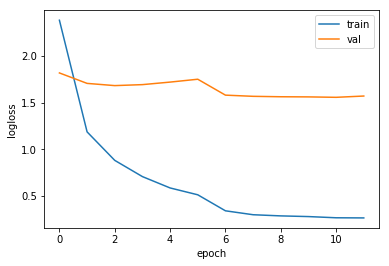

In [8]:
plt.plot(model.history.history['loss'], label='train');
plt.plot(model.history.history['val_loss'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('logloss');

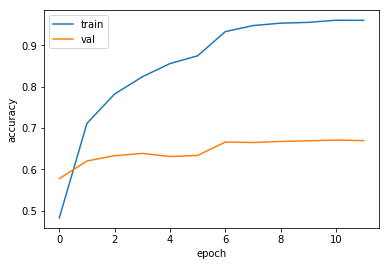

In [9]:
plt.plot(model.history.history['acc'], label='train');
plt.plot(model.history.history['val_acc'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');

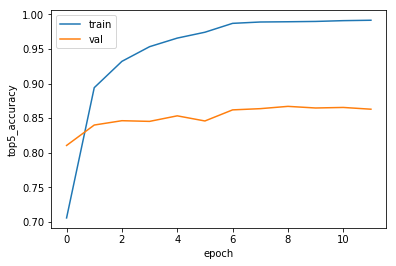

In [10]:
plt.plot(model.history.history['top_k_categorical_accuracy'], label='train');
plt.plot(model.history.history['val_top_k_categorical_accuracy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('top5_accuracy');

# Results

In [11]:
model.evaluate_generator(val_generator, 80)

[1.5555390566587448, 0.67167968749999996, 0.865234375]